# Classification
<p> With different types of Algorithms</p>

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X, y = iris.data, iris.target

In [2]:
print(X[1])

[4.9 3.  1.4 0.2]


In [3]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
results = {}

## DecisionTree
<p>However scikit-learn implementation does not support categorical variables for now</p>

In [5]:
#https://scikit-learn.org/stable/modules/tree.html
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [6]:
#However scikit-learn implementation does not support categorical variables for now
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=0)

In [7]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
from sklearn.model_selection import cross_val_score

##default = accuracy
scores = cross_val_score(clf_tree, X, y, cv=3, scoring='f1_weighted')
scores

array([0.97996313, 0.9398894 , 0.97998268])

In [8]:
import numpy as np

results["tree"] = np.mean(scores)

In [9]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
from sklearn.model_selection import cross_validate

scores = cross_validate(clf_tree, X, y, cv=3, scoring=('f1_weighted', 'precision_weighted', 'recall_weighted'), return_train_score=True)

In [10]:
print('test_f1_weighted')
print(np.mean(scores['test_f1_weighted']),scores['test_f1_weighted'])
print()

print('test_precision_weighted')
print(np.mean(scores['test_precision_weighted']),scores['test_precision_weighted'])
print()

print('test_recall_weighted')
print(np.mean(scores['test_recall_weighted']),scores['test_recall_weighted'])

test_f1_weighted
0.9666117395149653 [0.97996313 0.9398894  0.97998268]

test_precision_weighted
0.9677037037037038 [0.98111111 0.94088889 0.98111111]

test_recall_weighted
0.9666666666666667 [0.98 0.94 0.98]


In [11]:
print('train_f1_weighted')
print(np.mean(scores['train_f1_weighted']),scores['train_f1_weighted'])

print('train_precision_weighted')
print(np.mean(scores['train_precision_weighted']),scores['train_precision_weighted'])

print('train_recall_weighted')
print(np.mean(scores['train_recall_weighted']),scores['train_recall_weighted'])

train_f1_weighted
1.0 [1. 1. 1.]
train_precision_weighted
1.0 [1. 1. 1.]
train_recall_weighted
1.0 [1. 1. 1.]


In [12]:
model_trees = clf_tree.fit(X, y)

In [13]:
model_trees.predict([[2., 2., 3., 3.]])

array([2])

In [14]:
#As an alternative to outputting a specific class, the probability of each class can be predicted, which is the fraction of training samples of the class in a leaf
model_trees.predict_proba([[2., 2., 3., 3.]])

array([[0., 0., 1.]])

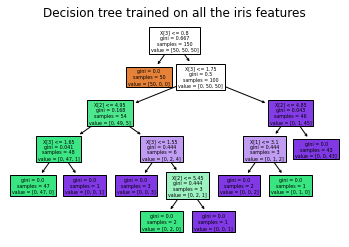

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
plt.rcParams["figure.figsize"] = (20,20)
plot_tree(model_trees, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [16]:
#AVALIAÇÃO com HIPERPARÂMETRO

#https://scikit-learn.org/stable/modules/grid_search.html#grid-search
#When specifying multiple metrics, the refit parameter must be set to the metric (string) for which 
#the best_params_ will be found and used to build the best_estimator_ on the whole dataset. 
#If the search should not be refit, set refit=False. Leaving refit to the default value None will 
#result in an error when using multiple metrics.

#https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
#vide figura

#https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

In [17]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['entropy'], 'max_depth':[3, 7, 9]}
best_tree = GridSearchCV(clf_tree, param_grid, scoring=('f1_weighted'), cv=3, refit=True)
best_tree.fit(X, y)
#sorted(best_tree.cv_results_.keys())

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 7, 9]},
             scoring='f1_weighted')

In [18]:
import pandas as pd

df = pd.DataFrame(best_tree.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001436,0.000217,0.002053,0.000437,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.960000,0.939889,0.959861,0.953250,0.009448,1
1,0.000910,0.000044,0.001163,0.000195,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.959778,0.939889,0.960000,0.953222,0.009428,2
2,0.000852,0.000068,0.001049,0.000374,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",0.959778,0.939889,0.960000,0.953222,0.009428,2


In [19]:
best_model = best_tree.best_estimator_
best_model.fit(X, y)

df = pd.DataFrame(best_tree.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001436,0.000217,0.002053,0.000437,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.960000,0.939889,0.959861,0.953250,0.009448,1
1,0.000910,0.000044,0.001163,0.000195,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.959778,0.939889,0.960000,0.953222,0.009428,2
2,0.000852,0.000068,0.001049,0.000374,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",0.959778,0.939889,0.960000,0.953222,0.009428,2


In [20]:
print(best_tree.cv_results_['mean_test_score'])
print(best_tree.best_estimator_)
print(best_tree.best_params_)
print(best_tree.best_score_)

[0.95325017 0.95322239 0.95322239]
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
{'criterion': 'entropy', 'max_depth': 3}
0.95325017067759


In [21]:
#################################################
##exemplo completo - seleção e avaliação no teste
#################################################

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

param_grid = {'criterion':['entropy'], 'max_depth':[3, 7, 9]}
best_tree = GridSearchCV(clf_tree, param_grid, scoring=('f1_weighted'), cv=3)
best_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 7, 9]},
             scoring='f1_weighted')

In [23]:
df = pd.DataFrame(best_tree.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001649,0.000467,0.001633,0.000073,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.942857,0.971478,0.941723,0.952020,0.013767,3
1,0.001389,0.000313,0.001908,0.000288,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.942857,1.000000,0.941723,0.961527,0.027209,1
2,0.001575,0.000132,0.002100,0.000455,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",0.942857,1.000000,0.941723,0.961527,0.027209,1


In [24]:
print(best_tree.cv_results_['mean_test_score'])
print(best_tree.best_estimator_)
print(best_tree.best_params_)
print(best_tree.best_score_)

[0.95201959 0.96152683 0.96152683]
DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
{'criterion': 'entropy', 'max_depth': 7}
0.9615268329554043


In [25]:
from sklearn.metrics import classification_report

y_true, y_pred = y_test, best_tree.predict(X_test)
print(classification_report(y_true, y_pred))

#f1_score(y_true, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [26]:
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='weighted')

0.9779434092477569

In [27]:
#Para um exemplo de Nested Cross-Validation veja 
#https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html

## k-NN

In [28]:
#https://scikit-learn.org/stable/modules/neighbors.html#neighbors
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier


In [29]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X, y)

scores = cross_val_score(clf_knn, X, y, cv=3, scoring='f1_weighted')
scores

array([0.97996313, 0.95977778, 0.97998268])

In [30]:
results["knn"] = np.mean(scores)

In [31]:
clf_knn.predict([[2., 2., 3., 3.]])

array([1])

## Naive Bayes

In [32]:
#https://scikit-learn.org/stable/modules/naive_bayes.html
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

#https://towardsdatascience.com/how-i-was-using-naive-bayes-incorrectly-till-now-part-1-4ed2a7e2212b
#GaussianNB → When you have continuous features
#CategoricalNB →When you have categorical data
#MultinomialNB → Applied to text data

In [33]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X, y)

scores = cross_val_score(clf_nb, X, y, cv=3, scoring='f1_weighted')
scores

array([0.91985294, 0.9398894 , 0.95986111])

In [34]:
results["nb"] = np.mean(scores)

In [35]:
clf_nb.predict([[2., 2., 3., 3.]])

array([2])

## SVM

In [36]:
#https://scikit-learn.org/stable/modules/svm.html#svm
#SVC and NuSVC implement the “one-versus-one” approach for multi-class classification.
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [37]:
from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X, y)

scores = cross_val_score(clf_svm, X, y, cv=3, scoring='f1_weighted')
scores

array([0.96      , 0.97996313, 0.93994805])

In [38]:
results["svm"] = np.mean(scores)

In [39]:
clf_svm.predict([[2., 2., 3., 3.]])

array([2])

In [40]:
# get support vectors
print(clf_svm.support_vectors_)

# get indices of support vectors
print(clf_svm.support_)

# get number of support vectors for each class
print(clf_svm.n_support_)

[[5.7 3.8 1.7 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [4.5 2.3 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [5.6 3.  4.5 1.5]
 [6.2 2.2 4.5 1.5]
 [5.9 3.2 4.8 1.8]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [6.6 3.  4.4 1.4]
 [6.8 2.8 4.8 1.4]
 [6.7 3.  5.  1.7]
 [6.  2.9 4.5 1.5]
 [5.7 2.6 3.5 1. ]
 [6.  2.7 5.1 1.6]
 [5.4 3.  4.5 1.5]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [6.3 2.3 4.4 1.3]
 [5.5 2.6 4.4 1.2]
 [6.1 3.  4.6 1.4]
 [5.  2.3 3.3 1. ]
 [5.1 2.5 3.  1.1]
 [5.8 2.7 5.1 1.9]
 [4.9 2.5 4.5 1.7]
 [6.5 3.2 5.1 2. ]
 [6.4 2.7 5.3 1.9]
 [5.7 2.5 5.  2. ]
 [6.5 3.  5.5 1.8]
 [6.  2.2 5.  1.5]
 [5.6 2.8 4.9 2. ]
 [6.3 2.7 4.9 1.8]
 [6.2 2.8 4.8 1.8]
 [6.1 3.  4.9 1.8]
 [7.2 3.  5.8 1.6]
 [7.9 3.8 6.4 2. ]
 [6.3 2.8 5.1 1.5]
 [6.1 2.6 5.6 1.4]
 [6.4 3.1 5.5 1.8]
 [6.  3.  4.

## RNA

In [41]:
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier


In [42]:
#Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
#Currently, MLPClassifier supports only the Cross-Entropy loss function, which allows probability estimates by running the predict_proba method.
#MLP trains using Backpropagation. More precisely, it trains using some form of gradient descent and the gradients are calculated using Backpropagation.
#MLPClassifier supports multi-class classification by applying Softmax as the output function.


In [43]:
from sklearn.neural_network import MLPClassifier

#3 camadas intermediárias, uma com 50, a outra com 30 e a outra com 20
clf_mlp = MLPClassifier(hidden_layer_sizes=(50, 30, 20), max_iter=500, random_state=0)
clf_mlp.fit(X, y)

scores = cross_val_score(clf_mlp, X, y, cv=3, scoring='f1_weighted')
scores

array([1.        , 0.95977778, 0.96      ])

In [44]:
results["ann"] = np.mean(scores)

In [45]:
clf_mlp.predict([[2., 2., 3., 3.]])

array([2])

## Ensemble

In [46]:
#https://scikit-learn.org/stable/modules/ensemble.html#ensemble
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier


In [47]:
from sklearn.ensemble import AdaBoostClassifier

clf_AdaB = AdaBoostClassifier()
clf_AdaB.fit(X, y)

scores = cross_val_score(clf_AdaB, X, y, cv=3, scoring='f1_weighted')
scores

array([0.97996313, 0.92      , 0.95986111])

In [48]:
results["AdaB"] = np.mean(scores)

In [49]:
clf_AdaB.predict([[2., 2., 3., 3.]])

array([2])

## Final Results

In [51]:
for key, value in results.items():
    print(key, value)

tree 0.9666117395149653
knn 0.9732411984670049
nb 0.9398678177364136
svm 0.9599703951962016
ann 0.9732592592592592
AdaB 0.9532747482505547
